<a href="https://colab.research.google.com/github/Gazda70/DeepLearningInPython/blob/main/neural_nets_weather_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import cv2
import keras
import tensorflow as tf

In [ ]:
#from matplotlib import image
#from matplotlib import pyplot

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/DLiP_Lab3/weather.zip

In [ ]:
!ls -al  /content/gdrive/MyDrive/DLiP_Lab3/

total 93146
-rw------- 1 root root 95380686 Nov 25 07:20 weather.zip


In [ ]:
FILE='/content/weather/'
FILE_TWO_CLASSES='/content/weather/two_classes'
FILE_CLOUDY='/content/weather/cloudy'
FILE_RAIN='/content/weather/rain'
FILE_SHINE='/content/weather/shine'
FILE_SUNRISE='/content/weather/sunrise'

In [ ]:
import os

def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        if not os.path.isdir(indir+'/'+class_dir):
          continue
        print("Loading:",class_dir)
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (64,64))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels
samples, labels = load_img(FILE_TWO_CLASSES)
print('loaded',len(samples),' samples')
print('classes',set(labels))
org_samples = samples
org_labels = labels

Loading: sunrise
Loading: cloudy
loaded 657  samples
classes {'cloudy', 'sunrise'}


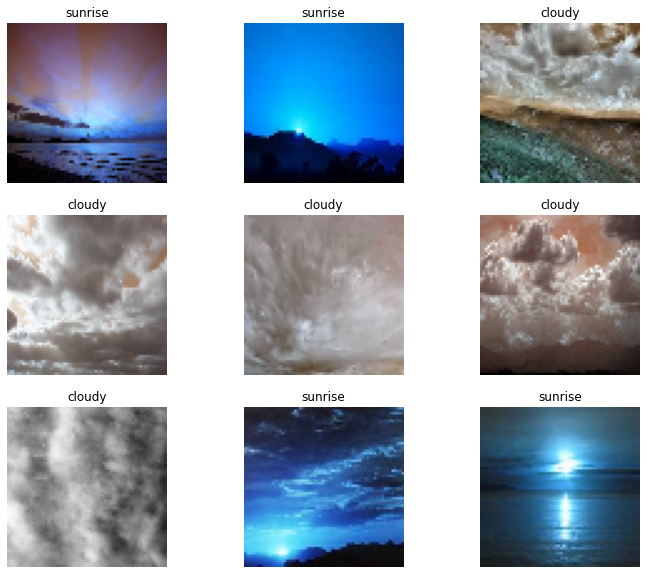

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(samples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[n])
    plt.title(labels[n])
    plt.axis("off")

In [ ]:
#TWO CLASSES ONE NEURON

In [ ]:
# one-hot labels
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() #binaryzacja, więc jedna zmienna (657, ->1) obsługuje dwie wartości
labels_first = lb.fit_transform(labels)
labels_first = labels_first.astype(float)
print("Labels shape",labels_first.shape)
print("labels")
print(labels)

In [ ]:
(trainSamplesFirst, testSamplesFirst, trainLabelsFirst, testLabelsFirst) = sklearn.model_selection.train_test_split(samples, labels_first, test_size=0.25, random_state=22)

In [ ]:
print("trainSamples: " + str(trainSamplesFirst.shape))
print("testSamples: " + str(testSamplesFirst.shape))
print("trainLabels: " + str(trainLabelsFirst.shape))
print("testLabels: " + str(testLabelsFirst.shape))

trainSamples: (492, 64, 64, 3)
testSamples: (165, 64, 64, 3)
trainLabels: (492, 1)
testLabels: (165, 1)


In [ ]:
#Two classes classifier - one neuron
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()
optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6)
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_48 (Bat  (None, 64, 64, 16)       64        
 chNormalization)                                                
                                                                 
 activation_96 (Activation)  (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_49 (Bat  (None, 32, 32, 32)     

In [ ]:
H = model.fit(trainSamplesFirst, trainLabelsFirst, epochs=15, validation_data=(testSamplesFirst, testLabelsFirst))

Epoch 1/15
16/16 [==============================] - 5s 252ms/step - loss: 0.3587 - accuracy: 0.8659 - val_loss: 1.0870 - val_accuracy: 0.7879
Epoch 2/15
16/16 [==============================] - 4s 234ms/step - loss: 0.0487 - accuracy: 0.9878 - val_loss: 0.3075 - val_accuracy: 0.9697
Epoch 3/15
16/16 [==============================] - 3s 218ms/step - loss: 0.0344 - accuracy: 0.9878 - val_loss: 0.8544 - val_accuracy: 0.8970
Epoch 4/15
16/16 [==============================] - 4s 237ms/step - loss: 0.1005 - accuracy: 0.9675 - val_loss: 0.2216 - val_accuracy: 0.9394
Epoch 5/15
16/16 [==============================] - 3s 214ms/step - loss: 0.0320 - accuracy: 0.9837 - val_loss: 0.1382 - val_accuracy: 0.9576
Epoch 6/15
16/16 [==============================] - 3s 214ms/step - loss: 0.0198 - accuracy: 0.9919 - val_loss: 0.5388 - val_accuracy: 0.8424
Epoch 7/15
16/16 [==============================] - 4s 236ms/step - loss: 0.0773 - accuracy: 0.9776 - val_loss: 0.1319 - val_accuracy: 0.9455
Epoch 

In [ ]:
print("trainSamplesFirst")
print(trainSamplesFirst)
print("testSamplesFirst")
print(testSamplesFirst)
print("trainLabelsFirst")
print(trainLabelsFirst)
print("testLabelsFirst")
print(testLabelsFirst)

In [ ]:
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples, labels, test_size=0.25, random_state=22)

In [ ]:
print("trainSamples")
print(trainSamples)
print("testSamples")
print(testSamples)
print("trainLabels")
print(trainLabels)
print("testLabelsFirst")
print(testLabelsFirst)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = model.predict(testSamplesFirst)
testResults = testResults.flatten()
print(testResults)
testLabelsFirst = testLabelsFirst.flatten()
print(testLabelsFirst)

print(confusion_matrix(testLabelsFirst.argmax(1), testResults.argmax(1)))
print(classification_report(testLabelsFirst.argmax(axis=1), testResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabelsFirst.argmax(axis=1), testResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabelsFirst.argmax(axis=1), testResults.argmax(axis=1)))

In [ ]:
#TWO CLASSES TWO NEURONS

In [ ]:
# one-hot labels
from sklearn.preprocessing import OneHotEncoder
lb = OneHotEncoder() #binaryzacja, więc jedna zmienna (657, ->1) obsługuje dwie wartości
print("labels")
print(labels)
labels_second = lb.fit_transform(labels.reshape(-1, 1))
print("labels_second shape",labels_second.shape)
print("labels_second")
print(labels_second)
labels_second = labels_second.toarray()
labels_second = labels_second.astype(float)
print("labels_second shape",labels_second.shape)

labels
['sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'
 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise' 'sunrise'

In [ ]:
labels_second = labels
print(labels_second.shape)

(657,)


In [ ]:
(trainSamplesSecond, testSamplesSecond, trainLabelsSecond, testLabelsSecond) = sklearn.model_selection.train_test_split(samples, labels_second, test_size=0.25, random_state=22)

In [ ]:
print("trainSamples: " + str(trainSamplesSecond.shape))
print("testSamples: " + str(testSamplesSecond.shape))
print("trainLabels: " + str(trainLabelsSecond.shape))
print("testLabels: " + str(testLabelsSecond.shape))

trainSamples: (492, 64, 64, 3)
testSamples: (165, 64, 64, 3)
trainLabels: (492, 2)
testLabels: (165, 2)


In [ ]:
#Two classes classifier - two neurons
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(2))
model.add(Activation("softmax"))

model.summary()
optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [ ]:
H = model.fit(trainSamplesSecond, trainLabelsSecond, epochs=15, validation_data=(testSamplesSecond, testLabelsSecond))

Epoch 1/15
16/16 [==============================] - 5s 241ms/step - loss: 0.8323 - accuracy: 0.8150 - val_loss: 0.6749 - val_accuracy: 0.7515
Epoch 2/15
16/16 [==============================] - 3s 213ms/step - loss: 0.1203 - accuracy: 0.9472 - val_loss: 1.5526 - val_accuracy: 0.6242
Epoch 3/15
16/16 [==============================] - 3s 215ms/step - loss: 0.0987 - accuracy: 0.9675 - val_loss: 0.7360 - val_accuracy: 0.8364
Epoch 4/15
16/16 [==============================] - 3s 213ms/step - loss: 0.2032 - accuracy: 0.9614 - val_loss: 0.8047 - val_accuracy: 0.7455
Epoch 5/15
16/16 [==============================] - 4s 219ms/step - loss: 0.0435 - accuracy: 0.9858 - val_loss: 0.1359 - val_accuracy: 0.9455
Epoch 6/15
16/16 [==============================] - 3s 218ms/step - loss: 0.0548 - accuracy: 0.9776 - val_loss: 0.0848 - val_accuracy: 0.9636
Epoch 7/15
16/16 [==============================] - 4s 219ms/step - loss: 0.0128 - accuracy: 0.9980 - val_loss: 0.0646 - val_accuracy: 0.9697
Epoch 

In [ ]:
print("trainSamplesSecond")
print(trainSamplesSecond)
print("testSamplesSecond")
print(testSamplesSecond)
print("trainLabelsSecond")
print(trainLabelsSecond)
print("testLabelsSecond")
print(testLabelsSecond)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = model.predict(testSamplesSecond)
print(len(testResults))
print(len(testLabelsSecond))
print(confusion_matrix(testLabelsSecond.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabelsSecond.argmax(axis=1), testResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabelsSecond.argmax(axis=1), testResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabelsSecond.argmax(axis=1), testResults.argmax(axis=1)))

6/6 [==============================] - 1s 121ms/step
165
165
[[72  0]
 [93  0]]
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        72
           1       0.00      0.00      0.00        93

    accuracy                           0.44       165
   macro avg       0.22      0.50      0.30       165
weighted avg       0.19      0.44      0.27       165

Cohen's Kappa: 0.0
Accuracy:  0.43636363636363634


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#FOUR CLASSES FOUR NEURONS

In [ ]:
# one-hot labels
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() #binaryzacja, więc jedna zmienna (657, ->1) obsługuje dwie wartości
labels_third = lb.fit_transform(labels)
print("Labels shape",labels_third.shape)
labels_third = labels_third.astype(float)

Labels shape (1123, 4)


In [ ]:
(trainSamplesThird, testSamplesThird, trainLabelsThird, testLabelsThird) = sklearn.model_selection.train_test_split(samples, labels_third, test_size=0.25, random_state=22)

In [ ]:
print("trainSamples: " + str(trainSamplesThird.shape))
print("testSamples: " + str(testSamplesThird.shape))
print("trainLabels: " + str(trainLabelsThird.shape))
print("testLabels: " + str(testLabelsThird.shape))

trainSamples: (842, 64, 64, 3)
testSamples: (281, 64, 64, 3)
trainLabels: (842, 4)
testLabels: (281, 4)


In [ ]:
#Four classes classifier
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(4))
model.add(Activation("softmax"))

model.summary()
optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_28 (Bat  (None, 64, 64, 16)       64        
 chNormalization)                                                
                                                                 
 activation_56 (Activation)  (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_29 (Bat  (None, 32, 32, 32)     

In [ ]:
H = model.fit(trainSamplesThird, trainLabelsThird, epochs=15, validation_data=(testSamplesThird,testLabelsThird))

Epoch 1/15
27/27 [==============================] - 66s 232ms/step - loss: 1.3414 - accuracy: 0.6473 - val_loss: 2.7583 - val_accuracy: 0.4591
Epoch 2/15
27/27 [==============================] - 6s 229ms/step - loss: 0.5679 - accuracy: 0.7969 - val_loss: 3.2145 - val_accuracy: 0.4342
Epoch 3/15
27/27 [==============================] - 6s 229ms/step - loss: 0.4651 - accuracy: 0.8409 - val_loss: 2.0615 - val_accuracy: 0.5623
Epoch 4/15
27/27 [==============================] - 6s 219ms/step - loss: 0.3201 - accuracy: 0.8777 - val_loss: 1.7685 - val_accuracy: 0.5801
Epoch 5/15
27/27 [==============================] - 6s 220ms/step - loss: 0.2564 - accuracy: 0.9097 - val_loss: 1.0015 - val_accuracy: 0.6797
Epoch 6/15
27/27 [==============================] - 6s 234ms/step - loss: 0.2072 - accuracy: 0.9406 - val_loss: 0.5894 - val_accuracy: 0.8185
Epoch 7/15
27/27 [==============================] - 6s 214ms/step - loss: 0.1837 - accuracy: 0.9311 - val_loss: 0.5203 - val_accuracy: 0.8185
Epoch

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = model.predict(testSamplesThird)

print(confusion_matrix(testLabelsThird.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabelsThird.argmax(axis=1), testResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabelsThird.argmax(axis=1), testResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabelsThird.argmax(axis=1), testResults.argmax(axis=1)))

9/9 [==============================] - 1s 56ms/step
[[70  8  5  0]
 [ 4 41  1  0]
 [ 3  1 65  1]
 [ 1  1  1 79]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        83
           1       0.80      0.89      0.85        46
           2       0.90      0.93      0.92        70
           3       0.99      0.96      0.98        82

    accuracy                           0.91       281
   macro avg       0.90      0.91      0.90       281
weighted avg       0.91      0.91      0.91       281

Cohen's Kappa: 0.8751985787738508
Accuracy:  0.9074733096085409
